In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pykrige.kriging_tools as kt


In [43]:
df_stations = pd.read_csv('Air_quality_data/Stazioni_qualit__dell_aria_20240430.csv')
df_air_quality1 = pd.read_csv('Air_quality_data/Dati_sensori_aria_2010-2017_20240430.csv', low_memory=False)
df_air_quality2 = pd.read_csv('Air_quality_data/Dati_sensori_aria_dal_2018_20240430.csv', low_memory=False)

In [44]:
# Add the two dataframes together by row
df_air_quality = pd.concat([df_air_quality1, df_air_quality2], axis=0)

In [45]:
milan_municipalities = [
    'Abbiategrasso', 'Albairate', 'Arconate', 'Arese', 'Arluno', 'Assago',
    'Baranzate', 'Bareggio', 'Basiano', 'Basiglio', 'Bellinzago Lombardo', 'Bernate Ticino', 'Besate', 'Binasco', 'Boffalora Sopra Ticino', 'Bollate', 'Bresso', 'Bubbiano', 'Buccinasco', 'Buscate', 'Bussero', 'Busto Garolfo',
    'Calvignasco', 'Cambiago', 'Canegrate', 'Carpiano', 'Carugate', 'Casarile', 'Casorezzo', 'Cassano d\'Adda', 'Cassina de\' Pecchi', 'Cassinetta di Lugagnano', 'Castano Primo', 'Cernusco sul Naviglio', 'Cerro Maggiore', 'Cerro al Lambro', 'Cesano Boscone', 'Cesate', 'Cinisello Balsamo', 'Cisliano', 'Cologno Monzese', 'Colturano', 'Corbetta', 'Cormano', 'Cornaredo', 'Corsico', 'Cuggiono', 'Cusago', 'Cusano Milanino',
    'Dairago', 'Dresano',
    'Gaggiano', 'Garbagnate Milanese', 'Gessate', 'Gorgonzola', 'Grezzago', 'Gudo Visconti',
    'Inveruno', 'Inzago',
    'Lacchiarella', 'Lainate', 'Legnano', 'Liscate', 'Locate di Triulzi',
    'Magenta', 'Magnago', 'Marcallo con Casone', 'Masate', 'Mediglia', 'Melegnano', 'Melzo', 'Mesero', 'Milano', 'Morimondo', 'Motta Visconti',
    'Nerviano', 'Nosate', 'Novate Milanese', 'Noviglio',
    'Opera', 'Ossona', 'Ozzero',
    'Paderno Dugnano', 'Pantigliate', 'Parabiago', 'Paullo', 'Pero', 'Peschiera Borromeo', 'Pessano con Bornago', 'Pieve Emanuele', 'Pioltello', 'Pogliano Milanese', 'Pozzo D\'Adda', 'Pozzuolo Martesana', 'Pregnana Milanese',
    'Rescaldina', 'Rho', 'Robecchetto con Induno', 'Robecco sul Naviglio', 'Rodano', 'Rosate', 'Rozzano',
    'San Colombano al Lambro', 'San Donato Milanese', 'San Giorgio su Legnano', 'San Giuliano Milanese', 'San Vittore Olona', 'San Zenone al Lambro', 'Santo Stefano Ticino', 'Sedriano', 'Segrate', 'Senago', 'Sesto San Giovanni', 'Settala', 'Settimo Milanese', 'Solaro',
    'Trezzano Rosa', 'Trezzano sul Naviglio', 'Trezzo sull\'Adda', 'Tribiano', 'Truccazzano', 'Turbigo',
    'Vanzaghello', 'Vanzago', 'Vaprio d\'Adda', 'Vermezzo con Zelo', 'Vernate', 'Vignate', 'Villa Cortese', 'Vimodrone', 'Vittuone', 'Vizzolo Predabissi',
    'Zibido San Giacomo'
]

In [46]:
## Print the number of municipalities in Milan
print(len(milan_municipalities))

133


In [47]:
## Make a list of municipalities in Milan that are not in the dataset
not_in_dataset = [municipality for municipality in milan_municipalities if municipality not in df_stations['Comune'].unique()]
print(not_in_dataset)

['Albairate', 'Arluno', 'Assago', 'Baranzate', 'Bareggio', 'Basiano', 'Basiglio', 'Bellinzago Lombardo', 'Bernate Ticino', 'Besate', 'Binasco', 'Boffalora Sopra Ticino', 'Bollate', 'Bresso', 'Bubbiano', 'Buccinasco', 'Buscate', 'Bussero', 'Busto Garolfo', 'Calvignasco', 'Cambiago', 'Canegrate', 'Carpiano', 'Carugate', 'Casarile', 'Casorezzo', "Cassina de' Pecchi", 'Cassinetta di Lugagnano', 'Cernusco sul Naviglio', 'Cerro Maggiore', 'Cerro al Lambro', 'Cesano Boscone', 'Cesate', 'Cisliano', 'Cologno Monzese', 'Colturano', 'Corbetta', 'Cornaredo', 'Cusago', 'Cusano Milanino', 'Dairago', 'Dresano', 'Gaggiano', 'Gessate', 'Gorgonzola', 'Grezzago', 'Gudo Visconti', 'Inveruno', 'Liscate', 'Locate di Triulzi', 'Magnago', 'Marcallo con Casone', 'Masate', 'Mediglia', 'Melzo', 'Mesero', 'Morimondo', 'Nerviano', 'Nosate', 'Novate Milanese', 'Noviglio', 'Opera', 'Ossona', 'Ozzero', 'Paderno Dugnano', 'Pantigliate', 'Parabiago', 'Paullo', 'Peschiera Borromeo', 'Pessano con Bornago', 'Pieve Emanuel

In [48]:
## Drop rows with municipalities not in the list of milan_municipalities
df_milano_stations = df_stations[df_stations['Comune'].isin(milan_municipalities)]
print(df_milano_stations['Comune'].unique())

['Inzago' 'Pero' 'Sesto San Giovanni' 'Lacchiarella' 'Cormano' 'Corsico'
 'Milano' "Cassano d'Adda" 'Cuggiono' "Trezzo sull'Adda"
 'Cinisello Balsamo' 'Legnano' 'Motta Visconti' 'Magenta' 'Turbigo'
 'Robecchetto con Induno' 'Arconate' 'Settimo Milanese' 'Pioltello' 'Rho'
 'San Giuliano Milanese' 'Arese' 'Abbiategrasso' 'Melegnano' 'Lainate'
 'Garbagnate Milanese' 'Tribiano' 'Castano Primo' 'Truccazzano']


In [49]:
## Print the number of municipalities in province of Milan that have air quality data
print(len(df_milano_stations['Comune'].unique()))

29


In [50]:
## Count the number of rows for each unique value in 'NomeTipoSensore' column
print(df_milano_stations['NomeTipoSensore'].value_counts())

Ossidi di Azoto               38
Biossido di Azoto             38
Biossido di Zolfo             32
Monossido di Carbonio         26
Ozono                         17
Particolato Totale Sospeso    14
PM10 (SM2005)                 13
Benzene                        7
Particelle sospese PM2.5       6
BlackCarbon                    5
Ammoniaca                      4
Arsenico                       3
Piombo                         3
Nikel                          3
Benzo(a)pirene                 3
Cadmio                         3
Name: NomeTipoSensore, dtype: int64


In [51]:
## Get  the unique values of 'UnitaMisura' column
print(df_milano_stations['UnitaMisura'].unique())


['µg/m³' 'ng/m³' 'mg/m³']


In [52]:
## Get the list IdSensore for each unique value in 'NomeTipoSensore' column
idSensor_grouped_by_type = df_milano_stations.groupby('NomeTipoSensore')['IdSensore'].unique()
print(idSensor_grouped_by_type)

NomeTipoSensore
Ammoniaca                                          [20020, 20484, 10269, 20525]
Arsenico                                                  [12608, 12638, 12625]
Benzene                            [17127, 6057, 6037, 9998, 6062, 6059, 17126]
Benzo(a)pirene                                            [12641, 12611, 12629]
Biossido di Azoto             [5507, 5513, 5531, 5550, 5520, 5549, 5519, 554...
Biossido di Zolfo             [5620, 5621, 5618, 5617, 5627, 5643, 5642, 563...
BlackCarbon                                 [20455, 29001, 20004, 20465, 20005]
Cadmio                                                    [12626, 12609, 12639]
Monossido di Carbonio         [5814, 5820, 5819, 5835, 5831, 5813, 5834, 581...
Nikel                                                     [12624, 12637, 12607]
Ossidi di Azoto               [6342, 6318, 6338, 6350, 6360, 6346, 6276, 629...
Ozono                         [5712, 5714, 5710, 5713, 5724, 5725, 10350, 57...
PM10 (SM2005)           

In [53]:
## Print the number of rows in the air quality dataframe for each unique value in 'IdSensore' column
print(df_air_quality['idSensore'].value_counts())

6665     122511
5721     122428
5548     122419
6419     122390
5749     122381
5557     122375
5730     122357
6338     122336
6230     122333
5750     122326
5658     122322
5568     122292
10041    122281
5577     122276
5805     122272
10329    122267
10038    122266
6398     122265
6706     122255
6248     122233
10037    122228
9972     122192
9971     122163
5567     122158
9968     122134
5555     122088
5965     122063
10301    122063
6402     122053
10019    122033
10025    122028
6428     122007
6234     121997
6587     121986
5953     121977
10017    121963
9969     121921
6412     121918
6005     121911
10036    121881
5742     121854
6382     121851
5739     121814
5504     121808
10018    121794
5827     121789
9861     121775
5842     121770
5950     121767
6408     121737
5574     121727
10259    121726
10258    121722
6380     121717
6328     121716
5563     121710
6582     121692
5845     121690
10020    121688
5798     121688
6374     121678
5704     121671
6400    

In [54]:
## Remove column 'idOperatore' from the air quality dataframe
df_air_quality = df_air_quality.drop('idOperatore', axis=1)
df_air_quality.head()

,idSensore,Data,Valore,Stato
0,5504,01/01/2010 01:00:00,70.7,VA
1,5504,01/01/2010 02:00:00,73.0,VA
2,5504,01/01/2010 03:00:00,69.0,VA
3,5504,01/01/2010 04:00:00,66.0,VA
4,5504,01/01/2010 05:00:00,68.8,VA


In [55]:
## Rename the column 'idSensore' to 'IdSensore' in the air quality dataframe
df_air_quality = df_air_quality.rename(columns={'idSensore': 'IdSensore'})
df_air_quality.head()

,IdSensore,Data,Valore,Stato
0,5504,01/01/2010 01:00:00,70.7,VA
1,5504,01/01/2010 02:00:00,73.0,VA
2,5504,01/01/2010 03:00:00,69.0,VA
3,5504,01/01/2010 04:00:00,66.0,VA
4,5504,01/01/2010 05:00:00,68.8,VA


In [56]:
## Add 'UnitaMisura' column to the air quality dataframe based on the 'IdSensore' column
df_air_quality = df_air_quality.merge(df_milano_stations[['IdSensore', 'UnitaMisura']], on='IdSensore')
df_air_quality.head()

,IdSensore,Data,Valore,Stato,UnitaMisura
0,5504,01/01/2010 01:00:00,70.7,VA,µg/m³
1,5504,01/01/2010 02:00:00,73.0,VA,µg/m³
2,5504,01/01/2010 03:00:00,69.0,VA,µg/m³
3,5504,01/01/2010 04:00:00,66.0,VA,µg/m³
4,5504,01/01/2010 05:00:00,68.8,VA,µg/m³


In [57]:
## Append the column 'NomeTipoSensore' to the air quality dataframe based on the 'IdSensore' column
df_air_quality = df_air_quality.merge(df_milano_stations[['IdSensore', 'NomeTipoSensore']], on='IdSensore')
df_air_quality.head()

,IdSensore,Data,Valore,Stato,UnitaMisura,NomeTipoSensore
0,5504,01/01/2010 01:00:00,70.7,VA,µg/m³,Biossido di Azoto
1,5504,01/01/2010 02:00:00,73.0,VA,µg/m³,Biossido di Azoto
2,5504,01/01/2010 03:00:00,69.0,VA,µg/m³,Biossido di Azoto
3,5504,01/01/2010 04:00:00,66.0,VA,µg/m³,Biossido di Azoto
4,5504,01/01/2010 05:00:00,68.8,VA,µg/m³,Biossido di Azoto


In [58]:
## Get the unique values of 'UnitaMisura'  for each unique value of 'NomeTipoSensore' in the air quality dataframe
unita_misura_grouped_by_type = df_air_quality.groupby('NomeTipoSensore')['UnitaMisura'].unique()
print(unita_misura_grouped_by_type)

NomeTipoSensore
Ammoniaca                     [µg/m³]
Arsenico                      [ng/m³]
Benzene                       [µg/m³]
Benzo(a)pirene                [ng/m³]
Biossido di Azoto             [µg/m³]
Biossido di Zolfo             [µg/m³]
BlackCarbon                   [µg/m³]
Cadmio                        [ng/m³]
Monossido di Carbonio         [mg/m³]
Nikel                         [ng/m³]
Ossidi di Azoto               [µg/m³]
Ozono                         [µg/m³]
PM10 (SM2005)                 [µg/m³]
Particelle sospese PM2.5      [µg/m³]
Particolato Totale Sospeso    [µg/m³]
Piombo                        [ng/m³]
Name: UnitaMisura, dtype: object


In [59]:
## Remove rows where 'NomeTipoSensore' has the value 'Cadmio', 'Benzo(a)pirene', 'Nikel', 'Piombo', 'Arsenico', 'Ammoniaca', 'BlackCarbon', 'Particelle sospese PM2.5', 'Benzene'
df_air_quality = df_air_quality[~df_air_quality['NomeTipoSensore'].isin(['Cadmio', 'Benzo(a)pirene', 'Nikel', 'Piombo', 'Arsenico', 'Ammoniaca', 'BlackCarbon', 'Particelle sospese PM2.5', 'Benzene'])]
df_air_quality.head()

,IdSensore,Data,Valore,Stato,UnitaMisura,NomeTipoSensore
0,5504,01/01/2010 01:00:00,70.7,VA,µg/m³,Biossido di Azoto
1,5504,01/01/2010 02:00:00,73.0,VA,µg/m³,Biossido di Azoto
2,5504,01/01/2010 03:00:00,69.0,VA,µg/m³,Biossido di Azoto
3,5504,01/01/2010 04:00:00,66.0,VA,µg/m³,Biossido di Azoto
4,5504,01/01/2010 05:00:00,68.8,VA,µg/m³,Biossido di Azoto


In [60]:
## Count how many rows for each unique values of column 'Valore' that are less than 0 in the air quality dataframe
print(df_air_quality['Valore'][df_air_quality['Valore'] < 0].value_counts())

-9999.0    1676116
-0.2             2
-0.4             1
-0.1             1
Name: Valore, dtype: int64


In [61]:
## Convert the column 'Date' to datetime
df_air_quality['Data'] = pd.to_datetime(df_air_quality['Data'], dayfirst=True)
df_air_quality.head()

,IdSensore,Data,Valore,Stato,UnitaMisura,NomeTipoSensore
0,5504,2010-01-01 01:00:00,70.7,VA,µg/m³,Biossido di Azoto
1,5504,2010-01-01 02:00:00,73.0,VA,µg/m³,Biossido di Azoto
2,5504,2010-01-01 03:00:00,69.0,VA,µg/m³,Biossido di Azoto
3,5504,2010-01-01 04:00:00,66.0,VA,µg/m³,Biossido di Azoto
4,5504,2010-01-01 05:00:00,68.8,VA,µg/m³,Biossido di Azoto


In [62]:
## Add columns 'Year', 'Month', 'Day', 'Hour' to the air quality dataframe based on the 'Data' column
df_air_quality['Year'] = df_air_quality['Data'].dt.year
df_air_quality['Month'] = df_air_quality['Data'].dt.month
df_air_quality['Day'] = df_air_quality['Data'].dt.day
df_air_quality['Hour'] = df_air_quality['Data'].dt.hour
df_air_quality.head()

,IdSensore,Data,Valore,Stato,UnitaMisura,NomeTipoSensore,Year,Month,Day,Hour
0,5504,2010-01-01 01:00:00,70.7,VA,µg/m³,Biossido di Azoto,2010,1,1,1
1,5504,2010-01-01 02:00:00,73.0,VA,µg/m³,Biossido di Azoto,2010,1,1,2
2,5504,2010-01-01 03:00:00,69.0,VA,µg/m³,Biossido di Azoto,2010,1,1,3
3,5504,2010-01-01 04:00:00,66.0,VA,µg/m³,Biossido di Azoto,2010,1,1,4
4,5504,2010-01-01 05:00:00,68.8,VA,µg/m³,Biossido di Azoto,2010,1,1,5


In [63]:
## Append the column 'Comune' to the air quality dataframe based on the 'IdSensore' column
df_air_quality = df_air_quality.merge(df_milano_stations[['IdSensore', 'Comune']], on='IdSensore')
df_air_quality.head()

,IdSensore,Data,Valore,Stato,UnitaMisura,NomeTipoSensore,Year,Month,Day,Hour,Comune
0,5504,2010-01-01 01:00:00,70.7,VA,µg/m³,Biossido di Azoto,2010,1,1,1,Milano
1,5504,2010-01-01 02:00:00,73.0,VA,µg/m³,Biossido di Azoto,2010,1,1,2,Milano
2,5504,2010-01-01 03:00:00,69.0,VA,µg/m³,Biossido di Azoto,2010,1,1,3,Milano
3,5504,2010-01-01 04:00:00,66.0,VA,µg/m³,Biossido di Azoto,2010,1,1,4,Milano
4,5504,2010-01-01 05:00:00,68.8,VA,µg/m³,Biossido di Azoto,2010,1,1,5,Milano


In [66]:
## Save the air quality dataframe to a csv file 
df_air_quality.to_csv('df_air_quality_dateTime.csv', index=False)

In [22]:
df_air_quality = pd.read_csv('df_air_quality_dateTime.csv')
df_air_quality.head()

C:\Users\massi\AppData\Local\Temp\ipykernel_26044\4169795793.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_air_quality = pd.read_csv('df_air_quality_dateTime.csv')


,IdSensore,Data,Valore,Stato,UnitaMisura,NomeTipoSensore,Year,Month,Day,Hour,Comune
0,5504,2010-01-01 01:00:00,70.7,VA,µg/m³,Biossido di Azoto,2010,1,1,1,Milano
1,5504,2010-01-01 02:00:00,73.0,VA,µg/m³,Biossido di Azoto,2010,1,1,2,Milano
2,5504,2010-01-01 03:00:00,69.0,VA,µg/m³,Biossido di Azoto,2010,1,1,3,Milano
3,5504,2010-01-01 04:00:00,66.0,VA,µg/m³,Biossido di Azoto,2010,1,1,4,Milano
4,5504,2010-01-01 05:00:00,68.8,VA,µg/m³,Biossido di Azoto,2010,1,1,5,Milano


In [23]:
## Count how many NaN values in the column 'Valore' in the air quality dataframe
print(df_air_quality['Valore'].isnull().sum())

0


In [24]:
## Put NaN in  rows with values less than 0 in the column 'Valore' in the air quality dataframe
df_air_quality.loc[df_air_quality['Valore'] < 0, 'Valore'] = np.nan


In [25]:
## Count how many NaN values in the column 'Valore' in the air quality dataframe
print(df_air_quality['Valore'].isnull().sum())

1676120


In [26]:
## Count how many NaN for each year in the column 'Valore' in the air quality dataframe
print(df_air_quality.groupby('Year')['Valore'].apply(lambda x: x.isnull().sum()))

Year
2010    255728
2011    296907
2012    346931
2013    299951
2014    110516
2015    117520
2016    114149
2017     32460
2018     26696
2019     18229
2020     14733
2021     15588
2022     17513
2023      9199
2024         0
Name: Valore, dtype: int64


In [27]:
## Count how many NaN for each IdSensore in the column 'Valore' in the air quality dataframe
print(df_air_quality.groupby('IdSensore')['Valore'].apply(lambda x: x.isnull().sum()))



IdSensore
5504      3546
5505     35892
5506      2163
5507      5737
5508      1601
         ...  
10354      232
10355     6393
20427     4257
20428      104
20429       28
Name: Valore, Length: 173, dtype: int64


In [9]:
## Add a column 'YearlyAverage' to the air quality dataframe that contains the average value of 'Valore' for each year for each unique IdSensore
df_air_quality['YearlyAverage'] = df_air_quality.groupby(['Year', 'IdSensore'])['Valore'].transform('mean')
df_air_quality.head()

,IdSensore,Data,Valore,Stato,UnitaMisura,NomeTipoSensore,Year,Month,Day,Hour,Comune,YearlyAverage
0,5504,2010-01-01 01:00:00,70.7,VA,µg/m³,Biossido di Azoto,2010,1,1,1,Milano,73.336213
1,5504,2010-01-01 02:00:00,73.0,VA,µg/m³,Biossido di Azoto,2010,1,1,2,Milano,73.336213
2,5504,2010-01-01 03:00:00,69.0,VA,µg/m³,Biossido di Azoto,2010,1,1,3,Milano,73.336213
3,5504,2010-01-01 04:00:00,66.0,VA,µg/m³,Biossido di Azoto,2010,1,1,4,Milano,73.336213
4,5504,2010-01-01 05:00:00,68.8,VA,µg/m³,Biossido di Azoto,2010,1,1,5,Milano,73.336213


In [10]:
y_average=df_air_quality[['Year', 'IdSensore', 'NomeTipoSensore','YearlyAverage']].drop_duplicates()
y_average.head()

,Year,IdSensore,NomeTipoSensore,YearlyAverage
0,2010,5504,Biossido di Azoto,73.336213
8757,2011,5504,Biossido di Azoto,79.395491
17244,2012,5504,Biossido di Azoto,67.325237
25613,2013,5504,Biossido di Azoto,57.484775
34340,2014,5504,Biossido di Azoto,55.732471


In [11]:
## for each IdSensore make a column for every year with its respective YearlyAverage
y_average = y_average.pivot_table(index=['IdSensore', 'NomeTipoSensore'], columns='Year', values='YearlyAverage')
y_average.head()

,Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
IdSensore,NomeTipoSensore,,,,,,,,,,,,,,,
5504,Biossido di Azoto,73.336213,79.395491,67.325237,57.484775,55.732471,75.268302,66.999654,64.388197,59.258082,57.610548,48.491295,44.348874,43.591399,43.825003,43.8
5506,Biossido di Azoto,64.051657,66.068298,67.154015,61.212845,47.973746,67.156559,51.702877,53.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5507,Biossido di Azoto,64.222032,67.438324,63.872621,54.068553,51.169834,60.002450,42.909536,55.655026,42.800700,42.268191,38.227980,42.031321,39.997747,37.594306,33.8
5508,Biossido di Azoto,46.620318,54.160047,57.405850,46.528702,34.282085,39.301586,38.114640,54.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5511,Biossido di Azoto,29.751904,32.469399,31.139307,33.215860,25.405678,24.758916,26.547022,23.375064,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
y_average_2015=y_average[y_average['Year']==2015]
y_average_2015.head()

,Year,IdSensore,NomeTipoSensore,YearlyAverage
42368,2015,5504,Biossido di Azoto,75.268302
160162,2015,5506,Biossido di Azoto,67.156559
217425,2015,5507,Biossido di Azoto,60.002450
334047,2015,5508,Biossido di Azoto,39.301586
392729,2015,5511,Biossido di Azoto,24.758916


In [30]:
y_average_2015_BioAz = y_average_2015[y_average_2015['NomeTipoSensore']=='Biossido di Azoto']
y_average_2015_BioAz.shape

(35, 4)

In [31]:
y_average_2015_BioAz.to_csv('y_average_2015_BioAz.csv', index=False)

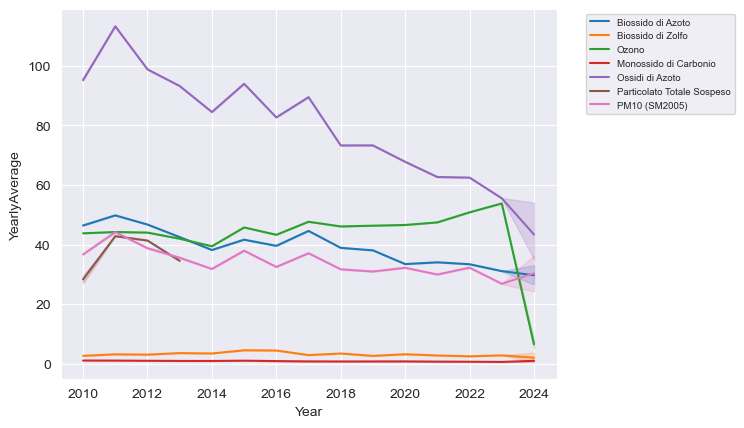

In [32]:
## Plot the average value of 'Valore' for each year for each unique IdSensore
sns.lineplot(x='Year', y='YearlyAverage', hue='NomeTipoSensore', data=df_air_quality)
plt.legend(fontsize='x-small', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [33]:
## Get the maximum value of 'Valore' for each unique NomeTipoSensore for each year in the air quality dataframe
max_values = df_air_quality.groupby(['Year', 'NomeTipoSensore'])['Valore'].max()
print(max_values)

Year  NomeTipoSensore      
2010  Biossido di Azoto         293.7
      Biossido di Zolfo         113.5
      Monossido di Carbonio      11.9
      Ossidi di Azoto          1548.6
      Ozono                     243.6
                                ...  
2024  Biossido di Zolfo           3.7
      Monossido di Carbonio       1.7
      Ossidi di Azoto            88.7
      Ozono                       9.7
      PM10 (SM2005)              46.7
Name: Valore, Length: 94, dtype: float64


In [34]:
## Create a dataframe with each unique value of 'NomeTipoSensore' as index and the YearlyAverage for each year as columns
df_yearly_average = df_air_quality.pivot_table(index='NomeTipoSensore', columns='Year', values='YearlyAverage')
df_yearly_average.head()

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
NomeTipoSensore,,,,,,,,,,,,,,,
Biossido di Azoto,46.398507,49.804847,46.721373,42.506211,38.168204,41.636087,39.569663,44.581334,38.891081,38.049908,33.439636,34.032689,33.384276,31.074580,29.681250
Biossido di Zolfo,2.622130,3.114778,3.015196,3.538496,3.404678,4.482031,4.401129,2.866932,3.396740,2.599475,3.140611,2.725559,2.458562,2.761955,2.000000
Monossido di Carbonio,1.039792,1.012024,0.948375,0.904076,0.890151,0.982997,0.849705,0.743203,0.718481,0.729579,0.745293,0.667850,0.631140,0.570415,0.933333
Ossidi di Azoto,95.237761,113.302847,98.847406,93.256901,84.509804,94.000838,82.708885,89.505104,73.297322,73.302886,67.798647,62.679938,62.491344,55.543914,43.386667
Ozono,43.777814,44.212293,44.017204,41.960761,39.421713,45.743827,43.277944,47.654187,46.086184,46.333021,46.578300,47.441895,50.823590,53.800880,6.500000


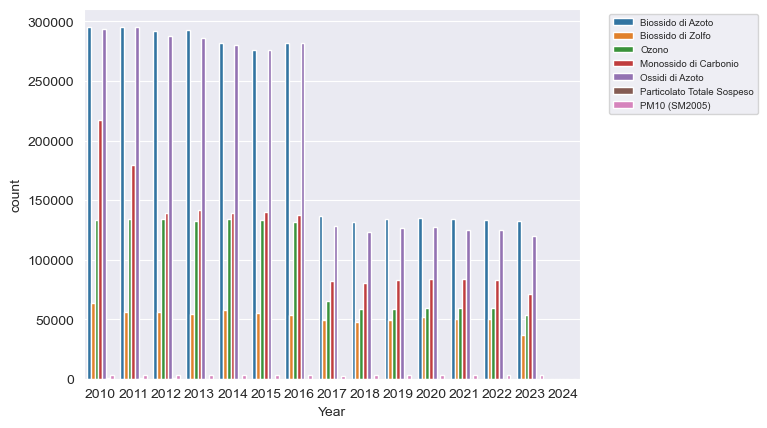

In [24]:
## Plot number of rows for each unique value in 'NomeTipoSensore' column per year in the air quality dataframe
sns.countplot(x='Year', hue='NomeTipoSensore', data=df_air_quality)
plt.legend(fontsize='x-small', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [35]:
## Df with YearlyAverage, max and min values of 'Valore' for each unique value of 'NomeTipoSensore', and the variance of 'Valore' for each unique value of 'NomeTipoSensore'
df_yearly_summary = df_air_quality.groupby(['Year', 'NomeTipoSensore'])['Valore'].agg(['mean', 'max', 'min', 'var'])
df_yearly_summary

mean     max   min           var
Year NomeTipoSensore                                             
2010 Biossido di Azoto      46.398507   293.7   0.0    891.006249
     Biossido di Zolfo       2.622130   113.5   0.0     10.065412
     Monossido di Carbonio   1.039792    11.9   0.0      0.329593
     Ossidi di Azoto        95.237761  1548.6   0.0  10507.353290
     Ozono                  43.777814   243.6   0.0   1648.093124
...                               ...     ...   ...           ...
2024 Biossido di Zolfo       2.000000     3.7   0.7      2.370000
     Monossido di Carbonio   0.933333     1.7   0.5      0.210667
     Ossidi di Azoto        43.386667    88.7  19.4    360.785524
     Ozono                   6.500000     9.7   4.2      4.136000
     PM10 (SM2005)          30.337500    46.7  14.0     89.996964

[94 rows x 4 columns]

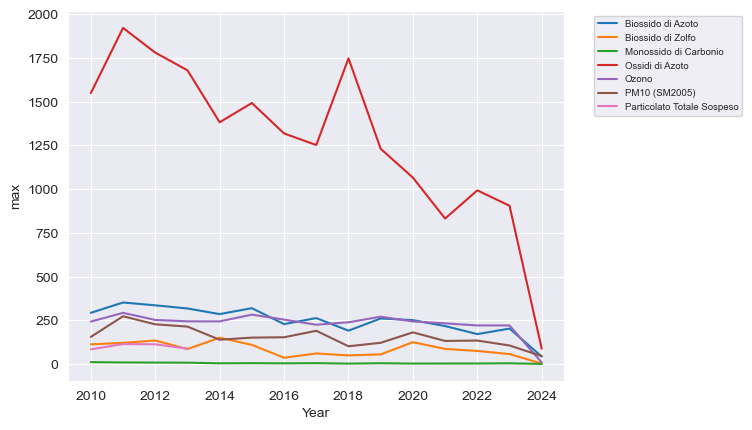

In [36]:
## Plot the max column of the df_yearly_summary dataframe
sns.lineplot(x='Year', y='max', hue='NomeTipoSensore', data=df_yearly_summary)
plt.legend(fontsize='x-small', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [37]:
## Create a dataframe with each unique value of 'NomeTipoSensore' as index and the average value of 'Valore' for all the rows that correspond to the same day as columns
df_daily_average = df_air_quality.pivot_table(index='NomeTipoSensore', columns=['Year', 'Month', 'Day'], values='Valore', aggfunc='mean')
df_daily_average.head()

Year                         2010                                     \
Month                          1                                       
Day                            1          2           3           4    
NomeTipoSensore                                                        
Biossido di Azoto       52.861111  29.575116   51.500000   62.497880   
Biossido di Zolfo        3.481683   2.154502    2.513744    2.816327   
Monossido di Carbonio    1.914609   1.226500    1.254941    1.520167   
Ossidi di Azoto        158.952295  63.244907  106.317477  135.316863   
Ozono                    6.723098  33.270052   25.146354   10.609896   

Year                                                                   \
Month                                                                   
Day                            5           6           7           8    
NomeTipoSensore                                                         
Biossido di Azoto       59.024180   59.928010   74.977738   57.460476   
Biossido di Zolfo        3.057310    4.673262    3.820321    2.343850   
Monossido di Carbonio    1.556055    1.517043    1.839932    1.408333   
Ossidi di Azoto        143.176914  117.062574  210.003943  117.301667   
Ozono                    8.343597   10.833943    8.272656   11.860156   

Year                                          ...       2023             \
Month                                         ...         12              
Day                            9          10  ...         23         24   
NomeTipoSensore                               ...                         
Biossido di Azoto       51.737294  39.970588  ...  42.639063  26.050398   
Biossido di Zolfo        3.884286   4.514000  ...   3.633333   2.475000   
Monossido di Carbonio    1.568313   1.380036  ...   0.704861   0.645139   
Ossidi di Azoto        117.232000  80.513113  ...  70.581389  39.273371   
Ozono                    7.405469  15.655496  ...  27.415278  40.168056   

Year                                                                 \
Month                                                                 
Day                           25         26          27          28   
NomeTipoSensore                                                       
Biossido di Azoto      36.513021  39.379948   39.390104   40.848177   
Biossido di Zolfo       1.761111   1.980556    2.397222    2.254167   
Monossido di Carbonio   0.795833   0.956250    1.109722    1.169444   
Ossidi di Azoto        69.640833  80.873333  108.518611  117.062222   
Ozono                  24.431250   9.898611    3.559028    3.376389   

Year                                                         2024  
Month                                                          1   
Day                           29         30         31         1   
NomeTipoSensore                                                    
Biossido di Azoto      38.537760  36.307292  32.751042  29.681250  
Biossido di Zolfo       2.236111   2.445833   2.145833   2.000000  
Monossido di Carbonio   1.027083   0.993750   0.904167   0.933333  
Ossidi di Azoto        88.613056  75.209167  56.896944  43.386667  
Ozono                   3.310417   5.011111   8.054861   6.500000  

[5 rows x 5114 columns]

In [38]:
## Get the max value of the daily average for each unique value of 'NomeTipoSensore'
max_daily_average = df_daily_average.max(axis=1)
print(max_daily_average)



NomeTipoSensore
Biossido di Azoto             128.310049
Biossido di Zolfo               8.971014
Monossido di Carbonio           2.886213
Ossidi di Azoto               551.169428
Ozono                         130.399479
PM10 (SM2005)                 169.500000
Particolato Totale Sospeso    115.000000
dtype: float64


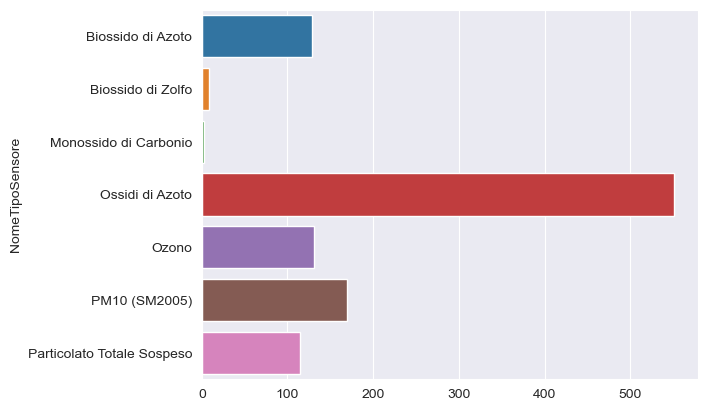

In [39]:
## Plot the max value of the daily average for each unique value of 'NomeTipoSensore'
sns.barplot(x=max_daily_average, y=max_daily_average.index)
plt.show()

In [40]:
## Get how many times the daily average is greater than 50 for Particelle sospese PM2.5 row for each year
df_air_quality[(df_air_quality['NomeTipoSensore'] == 'Particelle sospese PM2.5') & (df_air_quality['Valore'] > 50)].groupby('Year').size()

Series([], dtype: int64)

In [41]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
df_air_quality

,IdSensore,Data,Valore,Stato,UnitaMisura,NomeTipoSensore,Year,Month,Day,Hour,Comune,YearlyAverage
0,5504,2010-01-01 01:00:00,70.7,VA,µg/m³,Biossido di Azoto,2010,1,1,1,Milano,73.336213
1,5504,2010-01-01 02:00:00,73.0,VA,µg/m³,Biossido di Azoto,2010,1,1,2,Milano,73.336213
2,5504,2010-01-01 03:00:00,69.0,VA,µg/m³,Biossido di Azoto,2010,1,1,3,Milano,73.336213
3,5504,2010-01-01 04:00:00,66.0,VA,µg/m³,Biossido di Azoto,2010,1,1,4,Milano,73.336213
4,5504,2010-01-01 05:00:00,68.8,VA,µg/m³,Biossido di Azoto,2010,1,1,5,Milano,73.336213
...,...,...,...,...,...,...,...,...,...,...,...,...
9616743,20429,2023-12-28 00:00:00,52.9,VA,µg/m³,PM10 (SM2005),2023,12,28,0,Milano,29.968067
9616744,20429,2023-12-29 00:00:00,38.8,VA,µg/m³,PM10 (SM2005),2023,12,29,0,Milano,29.968067
9616745,20429,2023-12-30 00:00:00,40.9,VA,µg/m³,PM10 (SM2005),2023,12,30,0,Milano,29.968067
9616746,20429,2023-12-31 00:00:00,51.2,VA,µg/m³,PM10 (SM2005),2023,12,31,0,Milano,29.968067
